In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

def read_csv(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data[:, 0], data[:, 1], data[:, 2], data[:, 3]

def plot_precision_at_n(N_values, precision_values, label):
    decreasing_max_precision = np.maximum.accumulate(precision_values[::-1])[::-1]
    #plt.plot(N_values, precision_values, label=label)
    plt.step(N_values, decreasing_max_precision, label=label)

def plot_precision_recall_curve(recall, precision, label):
    decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
    #plt.plot(recall, precision, linestyle='-', label=label)
    plt.step(recall, decreasing_max_precision, label=label)

def plot_f_measure(N_values, f_measure_values, label):
    plt.plot(N_values, f_measure_values, label=label)


def calculate_average_precision(recalls, precision_values):
    sorted_indices = np.argsort(recalls)
    sorted_recalls = recalls[sorted_indices]
    sorted_precision = precision_values[sorted_indices]
    recall_diff = np.diff(sorted_recalls, prepend=0)
    average_precision = np.sum(sorted_precision * recall_diff)
    return average_precision


def calculate_map(N_values, precision_values):
    return np.trapz(precision_values, N_values) / np.max(N_values)

def process_and_plot_csv_files(file_paths, labels,  zoomx=[0.0, 1.05], zoomy=[0.0, 1.05]):
    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Calculate Average Precision
        average_precision = calculate_average_precision(recall_values, precision_values)
        print(f'Average Precision for {label}: {average_precision}')
        
        # Plot Precision-Recall Curve
        plot_precision_recall_curve(recall_values, precision_values, label=label)

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall@N')
    plt.ylabel('Precision@N')
    plt.xlim(zoomx)  # Set x-axis limits from 0 to 1.0
    plt.ylim(zoomy)  # Set y-axis limits from 0 to 1.0
    plt.legend()
    plt.show()

    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Plot F-measure
        plot_f_measure(N_values, f_measure_values, label=label)
    
    plt.title('F-measure for Query4(edismax)')
    plt.xlabel('N')
    plt.ylabel('F-measure')
    plt.legend()
    plt.show()

    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Plot Precision at N
        plot_precision_at_n(N_values, precision_values, label=label)

    plt.title('Precision at N')
    plt.xlabel('Metric Values')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

# Example usage:
""" csv_files = ['queries/ask4V2/metrics/metrics_e.csv', 'queries/ask4V1/metrics/metrics_e.csv']  # Replace with your file paths
labels = ['Schema 2', 'Schema 1']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels) """


" csv_files = ['queries/ask4V2/metrics/metrics_e.csv', 'queries/ask4V1/metrics/metrics_e.csv']  # Replace with your file paths\nlabels = ['Schema 2', 'Schema 1']  # Replace with your desired labels\nprocess_and_plot_csv_files(csv_files, labels) "

In [2]:
""" csv_files = ['queries/ask2/v2_EDISMAX_ALT/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 2 SCHEMA 2 - edismax alt']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels) """

" csv_files = ['queries/ask2/v2_EDISMAX_ALT/metrics/metrics.csv']  # Replace with your file paths\nlabels = ['Ask 2 SCHEMA 2 - edismax alt']  # Replace with your desired labels\nprocess_and_plot_csv_files(csv_files, labels) "

Average Precision for Q1 without Syns.: 0.977691031828963
Average Precision for Q1 with Syns.: 0.09126984126984126
Average Precision for Q2 without Syns.: 0.9379280317899418
Average Precision for Q2 with Syns.: 0.1484532268241033


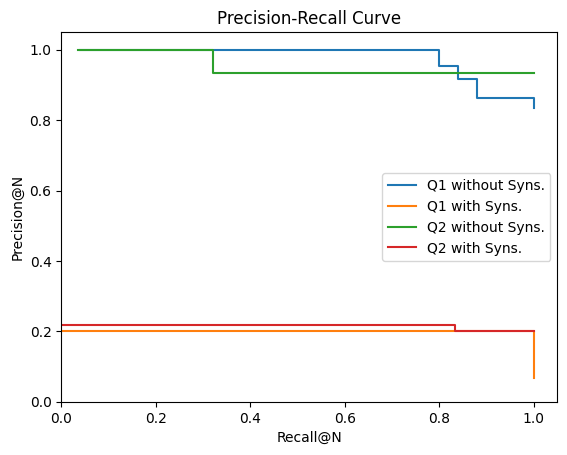

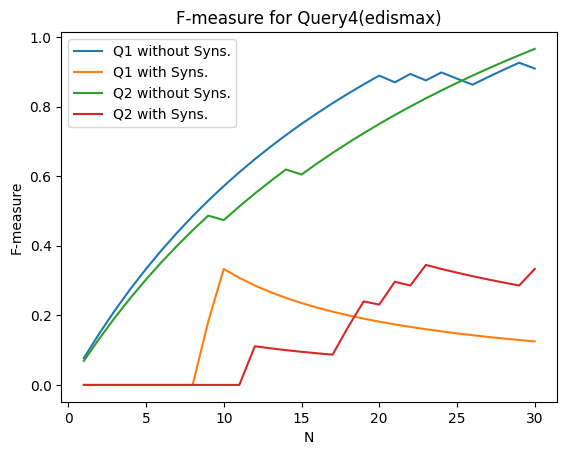

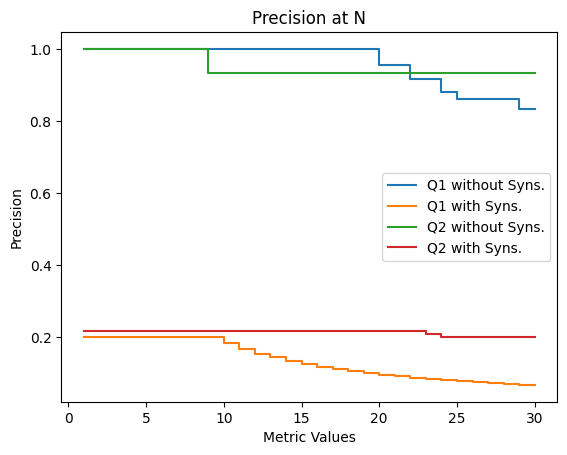

In [3]:
csv_files = ['queries_m3/synonyms/metrics_Q1_nosyn.csv',
             'queries_m3/synonyms/metrics_Q1_syn.csv', 
             'queries_m3/synonyms/metrics_Q2_nosyn.csv', 
             'queries_m3/synonyms/metrics_Q2_syn.csv']

labels = ['Q1 without Syns.', 'Q1 with Syns.', 'Q2 without Syns.', 'Q2 with Syns.'] 
process_and_plot_csv_files(csv_files, labels)

In [4]:
csv_files = ['queries/ask1_EDISMAX/V2/metrics/metrics.csv', 'queries/ask1_EDISMAX/V1/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 1 - version 2', 'Ask 1 - version 1']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels, zoomx=[0.0, 1.05], zoomy=[0.8, 1.05])

FileNotFoundError: queries/ask1_EDISMAX/V2/metrics/metrics.csv not found.

Average Precision for Ask 2 Schema 2 - lucene: 0.9379280317899418
Average Precision for Ask 2 Schema 2 - edismax: 0.9379280317899418
Average Precision for Ask 2 Schema 1 - lucene: 0.9376382782604602
Average Precision for Ask 2 Schema 1 - edismax: 0.9376382782604602


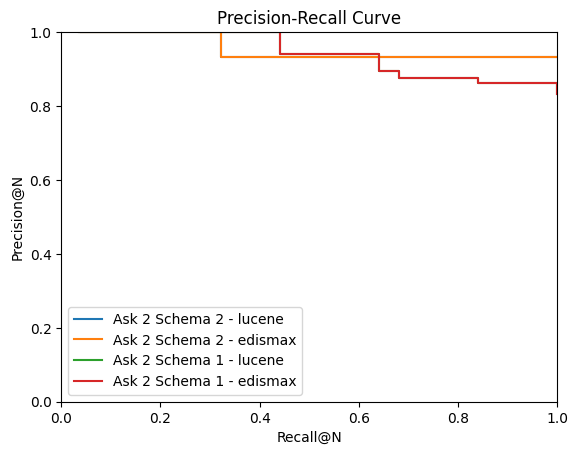

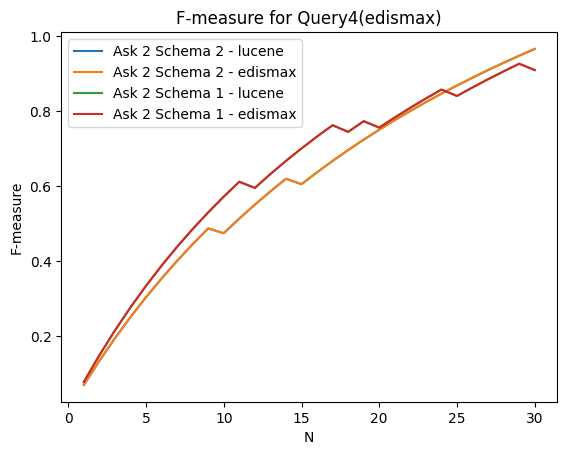

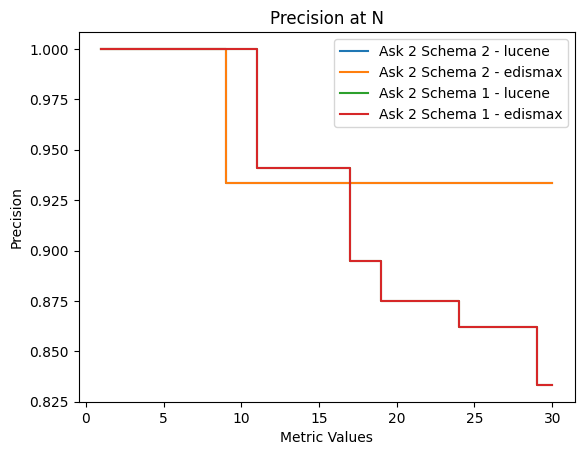

In [ ]:
csv_files = ['queries/ask2/v2_LUCENE/metrics/metrics.csv',
             'queries/ask2/v2_EDISMAX/metrics/metrics.csv', 
             'queries/ask2/v1_LUCENE/metrics/metrics.csv', 
             'queries/ask2/v1_EDISMAX/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 2 Schema 2 - lucene', 'Ask 2 Schema 2 - edismax', 'Ask 2 Schema 1 - lucene', 'Ask 2 Schema 1 - edismax']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels)

Average Precision for Ask 5 - version 2: 0.9444667505159958
Average Precision for Ask 5 - version 1: 0.7748883928571428


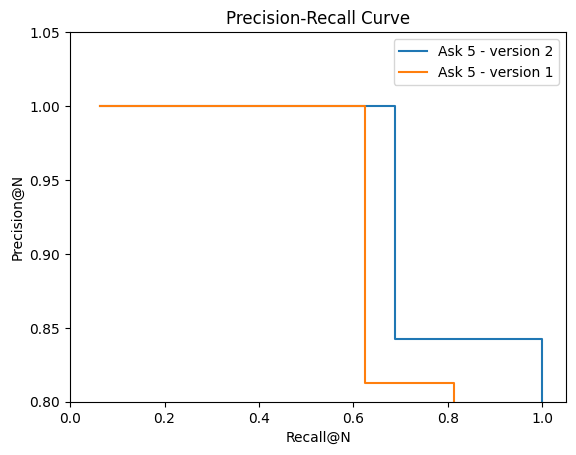

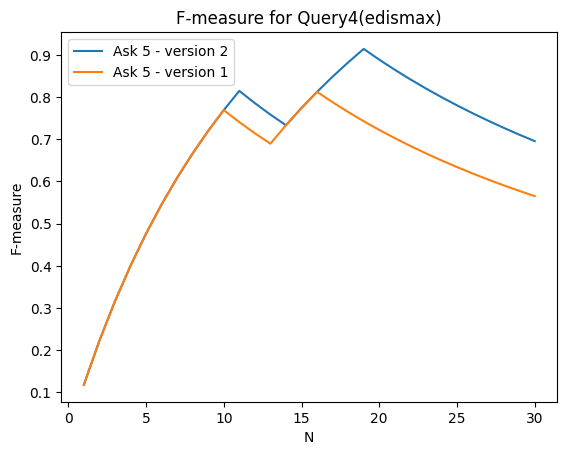

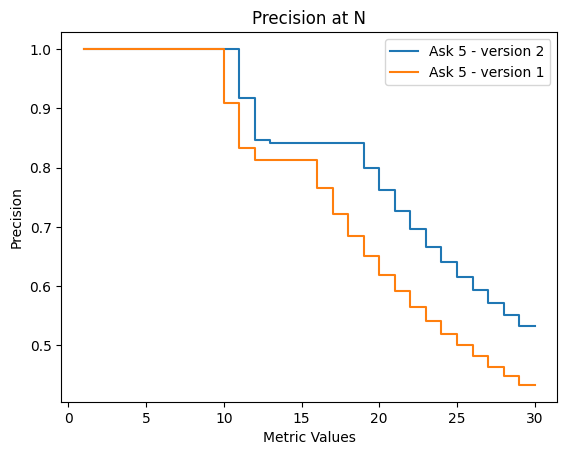

In [ ]:
csv_files = ['queries/ask5_EDISMAX/V2/metrics/metrics.csv', 'queries/ask5_EDISMAX/V1/metrics/metrics.csv']  # Replace with your file paths
labels = ['Ask 5 - version 2', 'Ask 5 - version 1']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels, zoomx=[0.0, 1.05], zoomy=[0.8, 1.05])

In [7]:
csv_files = ['queries/global4/metrics/metrics.csv', 'queries/global1/metrics/metrics.csv', 'queries/global2/metrics/metrics.csv', 'queries/global3/metrics/metrics.csv', 'queries/global5/metrics/metrics.csv']  # Replace with your file paths
labels = ['Global 4', 'Global 1', 'Global 2', 'Global 3', 'Global 5']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels, zoomx=[0.0, 1.05], zoomy=[0.0, 1.05])

FileNotFoundError: queries/global4/metrics/metrics.csv not found.

Average Precision for LTR 1: 0.8685586564987161
Average Precision for LTR 2: 0.9500361218924955
Average Precision for LTR 3: 0.4717614869376547
Average Precision for LTR 4: 0.8243397364722514
Average Precision for LTR 5: 0.272176169318302


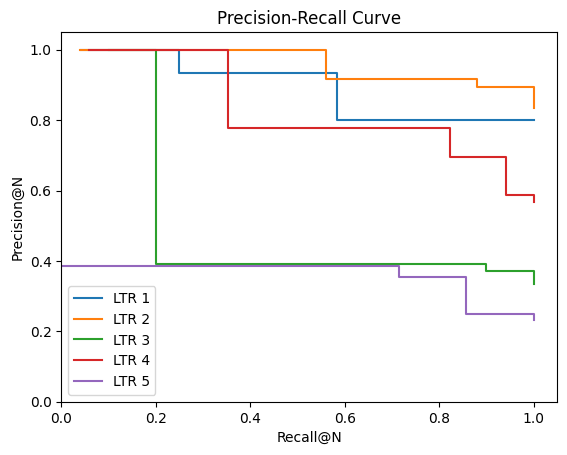

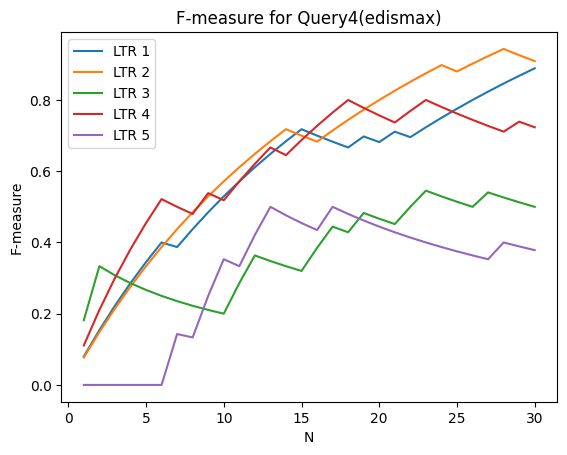

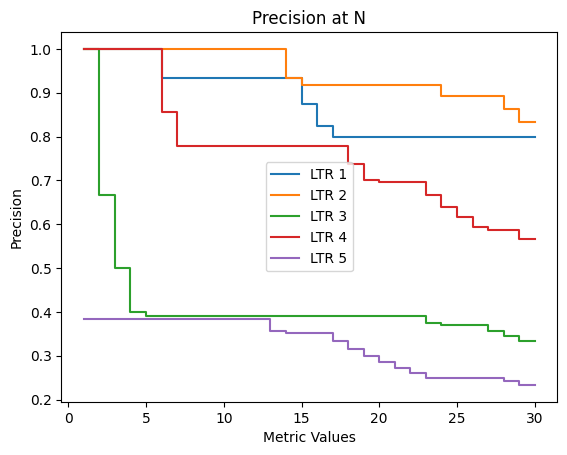

In [6]:
csv_files = ['../../ltr/metrics/query1_metrics.csv','../../ltr/metrics/query2_metrics.csv',
             '../../ltr/metrics/query3_metrics.csv','../../ltr/metrics/query4_metrics.csv',
               '../../ltr/metrics/query5_metrics.csv']  # Replace with your file paths
labels = ['LTR 1', 'LTR 2', 'LTR 3', 'LTR 4', 'LTR 5']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels, zoomx=[0.0, 1.05], zoomy=[0.0, 1.05])